In [1]:
from matplotlib import pyplot as plt

import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [2]:
def show_image(img, title='', cmap=plt.cm.gray_r):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.show()

In [3]:
def predict(image, label):
    show_image(image, title=label)
    image = np.expand_dims(image, axis=0)

    for model in models:
        pred_ohe = model.predict(image)
        print(f"{model.title}: {np.argmax(pred_ohe)}")

In [4]:
X_train = np.load('Data/x_train.npy')
X_test = np.load('Data/x_test.npy')
y_train = np.load('Data/y_train.npy')
y_test = np.load('Data/y_test.npy')

In [5]:
# scaling data
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [7]:
# One Hot Encoding y
y_train_ohe = tf.keras.utils.to_categorical(y_train)
y_test_ohe = tf.keras.utils.to_categorical(y_test)

In [8]:
model_pathes = list(filter(lambda path: path.endswith('.h5'), os.listdir()))
models = list(map(tf.keras.models.load_model, model_pathes))

In [9]:
for model, path in zip(models, model_pathes):
    model.title = path.rsplit('.', 1)[0]

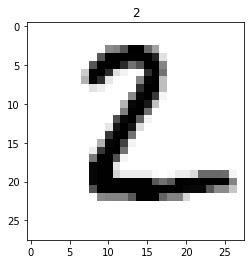

ConvModel: 2
SimpleModel: 2


In [10]:
predict(X_test[1], y_test[1])